<h1>Dubai Houses Renting Prediction</h1>


In [184]:
from pandas import *
from matplotlib.pyplot import *
import seaborn as sns
from numpy import *

In [185]:
data = read_csv("dubai_properties.csv")
data.sample(5)

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
25060,"Al Rawda 2, Al Rawda, Ajman",155000,6,8,Villa,5000,31.000000,High,Yearly,Unfurnished,For Rent,2024-03-10,42,Al Rawda,Ajman,25.385444,55.441620
58367,"5242 Tower 1, 5242 Towers, Dubai Marina, Dubai",210000,2,2,Apartment,1186,177.065767,High,Yearly,Furnished,For Rent,2024-02-26,55,Dubai Marina,Dubai,25.078641,55.135252
25177,"Al Helio, Ajman",95000,5,8,Villa,3014,31.519575,Medium,Yearly,Unfurnished,For Rent,2024-03-04,48,Al Helio,Ajman,25.400946,55.599527
16082,"Al Rayyana, Khalifa City, Abu Dhabi",100000,2,4,Apartment,1320,75.757576,Medium,Yearly,Unfurnished,For Rent,2024-01-05,107,Khalifa City,Abu Dhabi,24.420131,54.574954
8088,"Al Neem Residence, Rawdhat Abu Dhabi, Abu Dhabi",62999,1,2,Apartment,985,63.958376,Low,Yearly,Unfurnished,For Rent,2024-03-11,41,Rawdhat Abu Dhabi,Abu Dhabi,24.420065,54.462877


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [187]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Rent,73742.0,147925.001668,306965.830103,0.000000,54999.000000,98000.000000,170000.000000,5.500000e+07
Beds,73742.0,2.162811,1.578155,0.000000,1.000000,2.000000,3.000000,1.200000e+01
Baths,73742.0,2.650213,1.632997,1.000000,2.000000,2.000000,3.000000,1.100000e+01
Area_in_sqft,73742.0,2054.053552,3003.919252,74.000000,850.000000,1334.000000,2130.000000,2.102540e+05
Rent_per_sqft,73742.0,88.057754,66.534400,0.000000,39.977778,71.428571,118.483412,2.182045e+03
Age_of_listing_in_days,73742.0,74.261547,72.346767,11.000000,30.000000,52.000000,95.000000,2.276000e+03
Latitude,73023.0,24.918929,0.569356,15.175847,24.493598,25.078641,25.197978,2.592031e+01
Longitude,73023.0,55.053133,0.653722,43.351928,54.607372,55.238209,55.367138,5.636129e+01


<h2> Data Cleaning </h2>

In [188]:
data.duplicated().sum()

0

<h3>Dealing With Missing Data</h3>

In [189]:
def nullvalues(data):
    return DataFrame({col: data[col].isnull().sum() for col in data.columns}, index=["null values"]).T
print(data.shape)
nullvalues(data)

(73742, 17)


,null values
Address,0
Rent,0
Beds,0
Baths,0
Type,0
Area_in_sqft,0
Rent_per_sqft,0
Rent_category,0
Frequency,0
Furnishing,0


In [190]:
print(data["Longitude"].mean())
print(data["Longitude"].median())
print(data["Longitude"].std())
print(data["Latitude"].mean())
print(data["Latitude"].median())
print(data["Latitude"].std())

55.0531333689866
55.23820948643042
0.6537222779838704
24.91892948234255
25.0786415
0.5693556084929702


In [191]:
data["Longitude"].fillna(data["Longitude"].mean(),inplace=True)
data["Latitude"].fillna(data["Latitude"].mean(),inplace= True)

C:\Users\W.I\AppData\Local\Temp\ipykernel_15572\1157167093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Longitude"].fillna(data["Longitude"].mean(),inplace=True)
C:\Users\W.I\AppData\Local\Temp\ipykernel_15572\1157167093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

<h3>Data Visualization</h3>

In [192]:
print(data["Beds"].nunique())
print(data["Baths"].nunique())
print(data["Type"].nunique())
print(data["Rent_category"].nunique())
print(data["Furnishing"].nunique())
print(data["Location"].nunique())
print(data["City"].nunique())

13
11
9
3
2
441
8


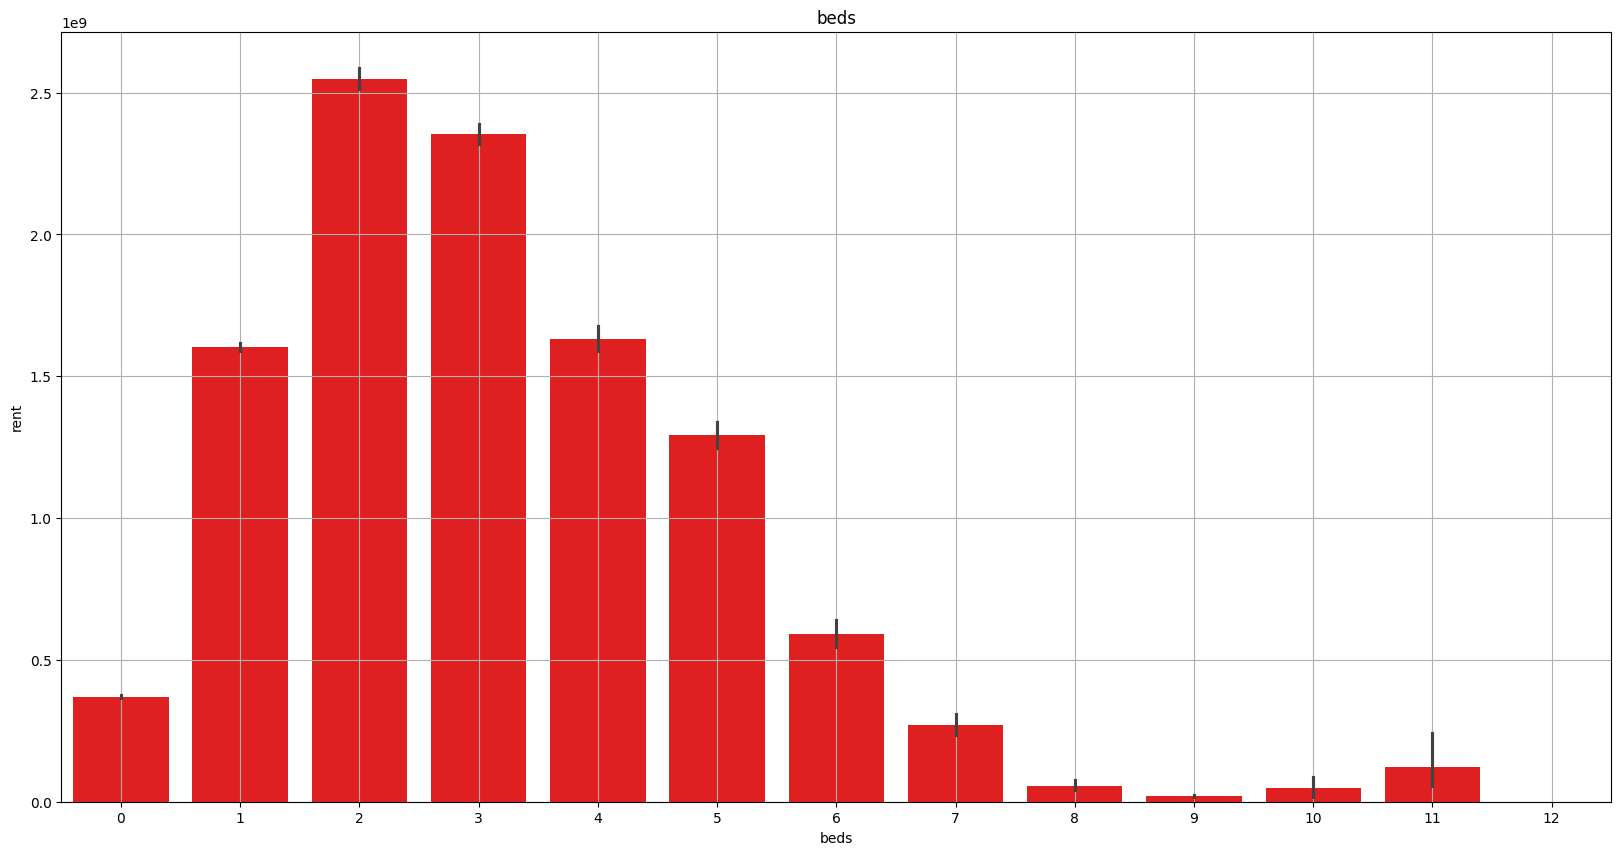

In [193]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Beds"],y=data["Rent"],color="red",estimator=sum)
title("beds")
xlabel("beds")
ylabel("rent")
grid(True)
show()

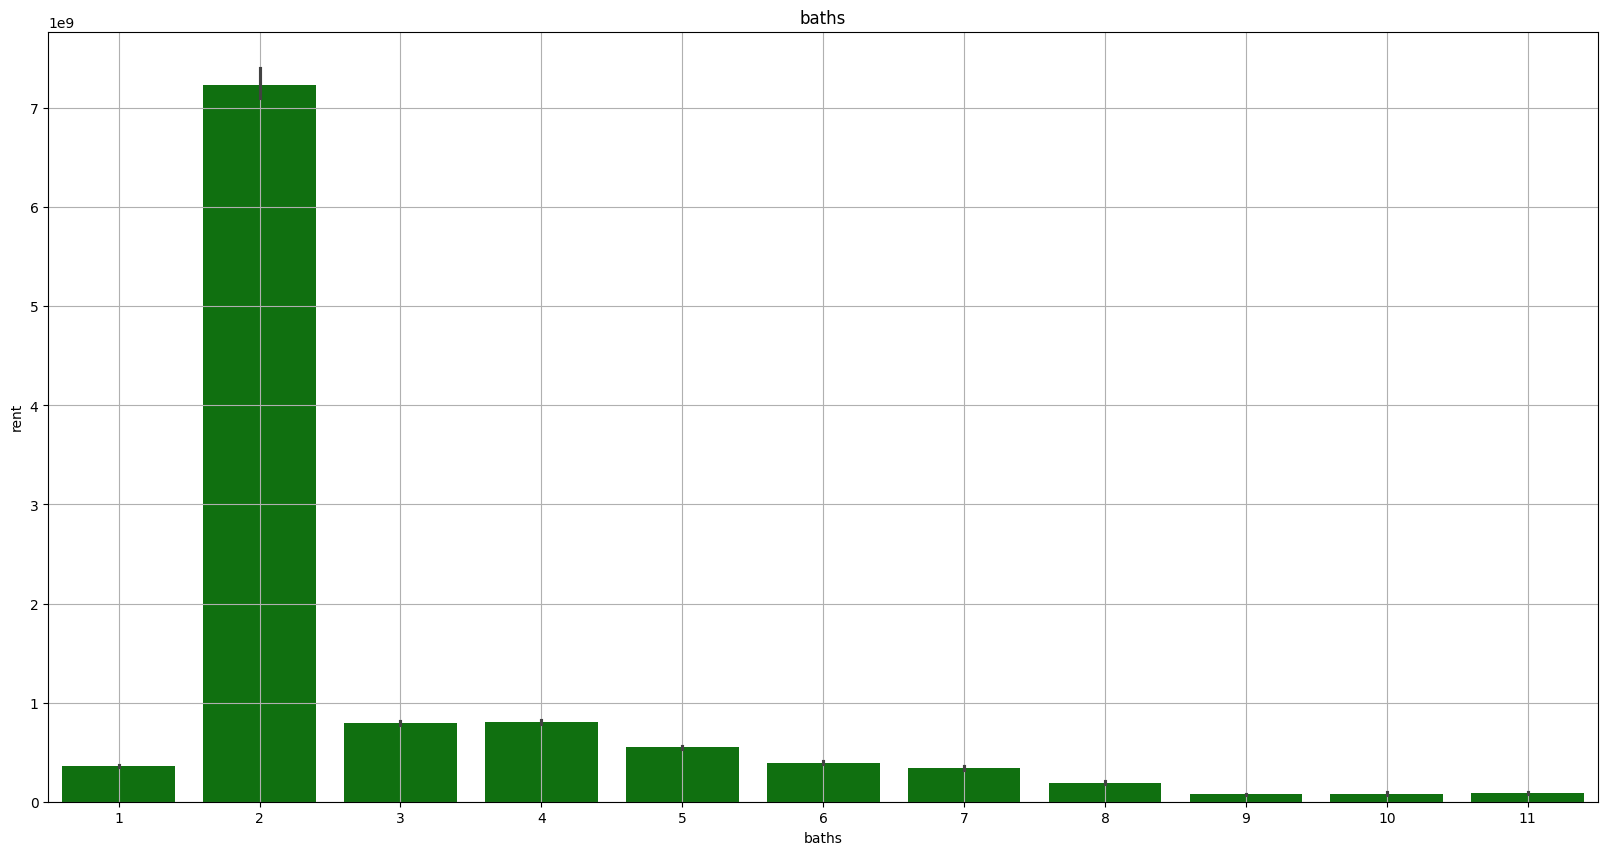

In [194]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Baths"],y=data["Rent"],color="green",estimator=sum)
title("baths")
xlabel("baths")
ylabel("rent")
grid(True)
show()

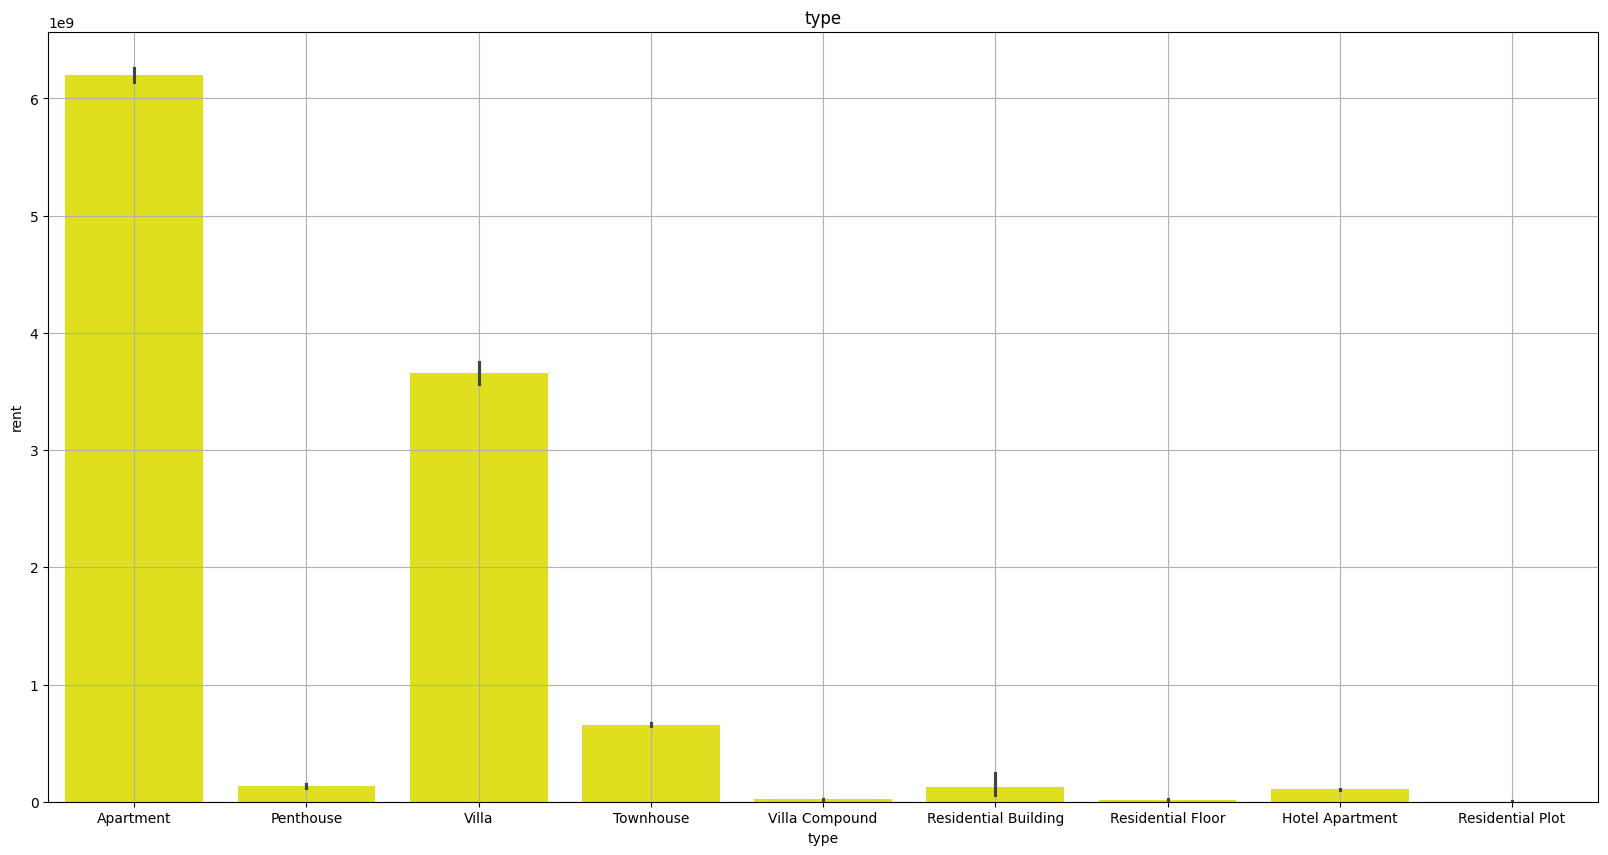

In [195]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Type"],y=data["Rent"],color="yellow",estimator=sum)
title("type")
xlabel("type")
ylabel("rent")
grid(True)
show()

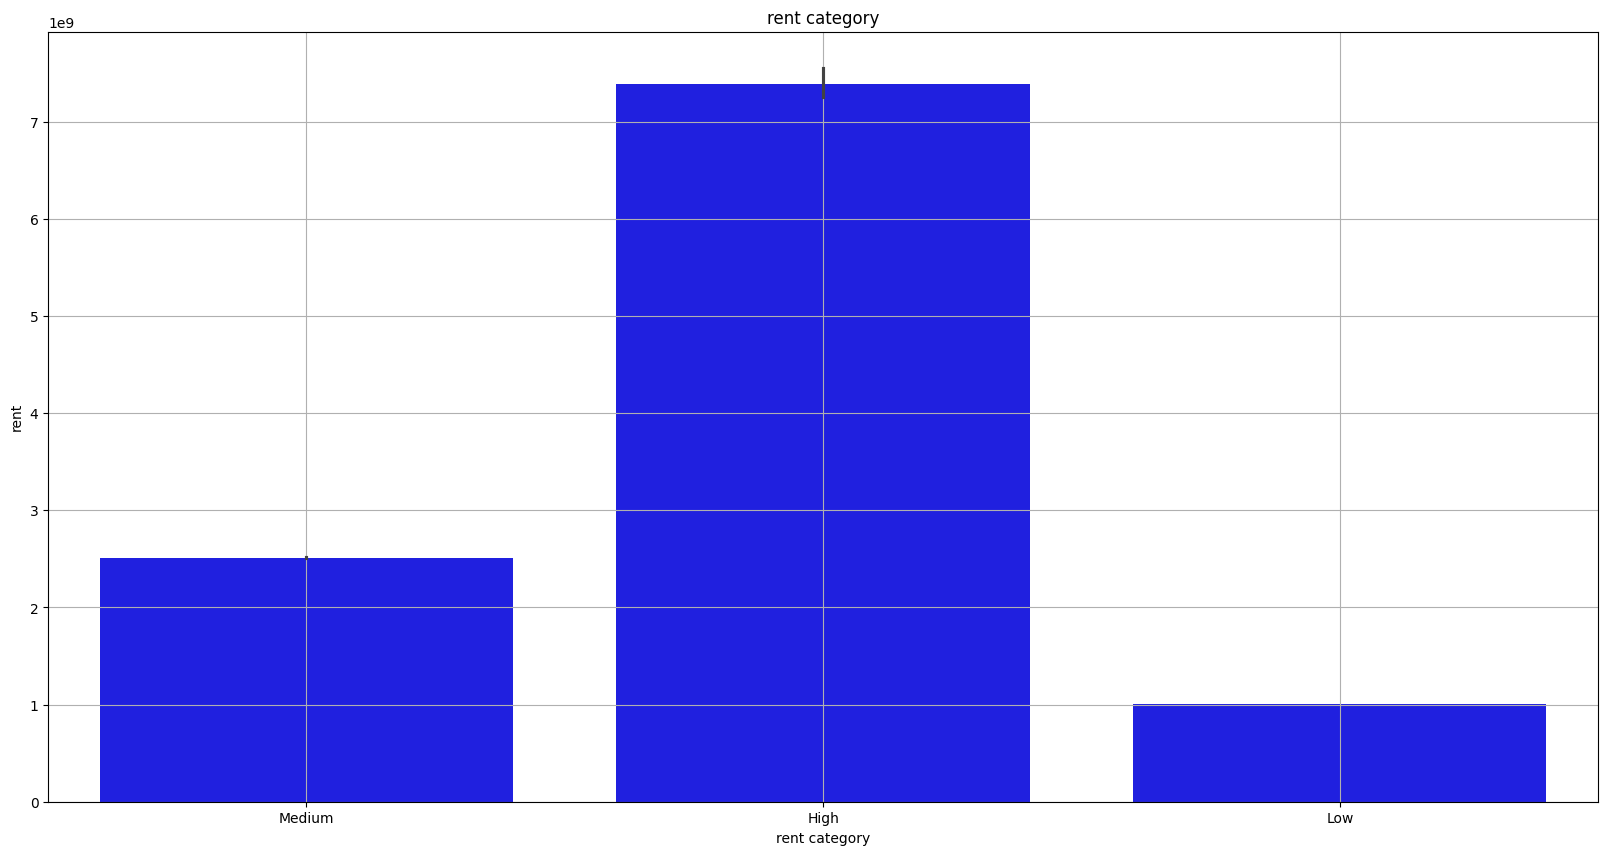

In [196]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Rent_category"],y=data["Rent"],color="blue",estimator=sum)
title("rent category")
xlabel("rent category")
ylabel("rent")
grid(True)
show()

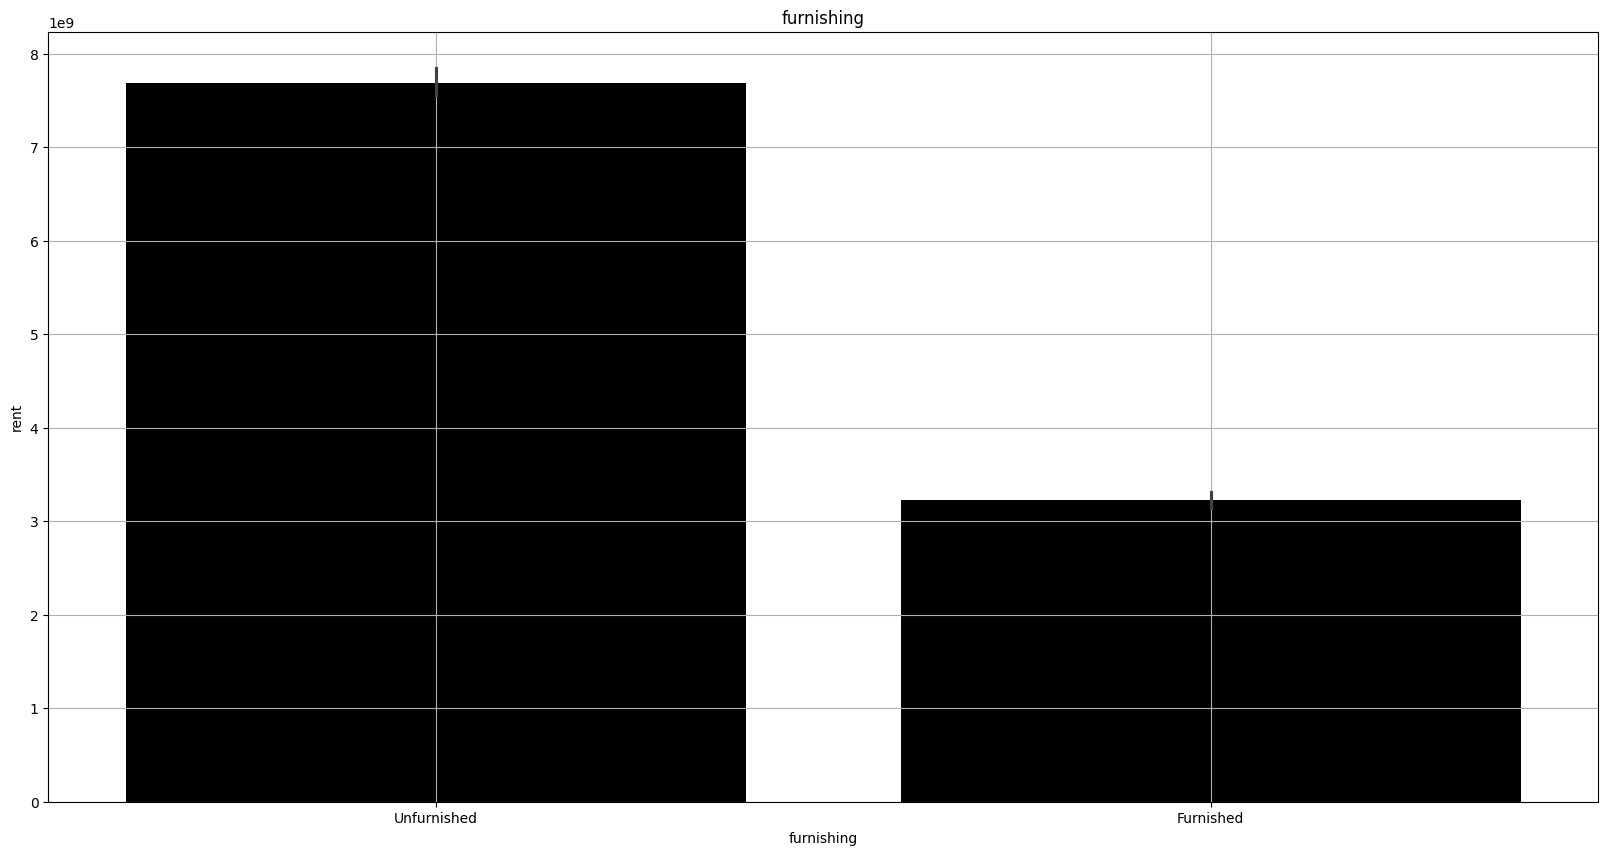

In [197]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Furnishing"],y=data["Rent"],color="black",estimator=sum)
title("furnishing")
xlabel("furnishing")
ylabel("rent")
grid(True)
show()

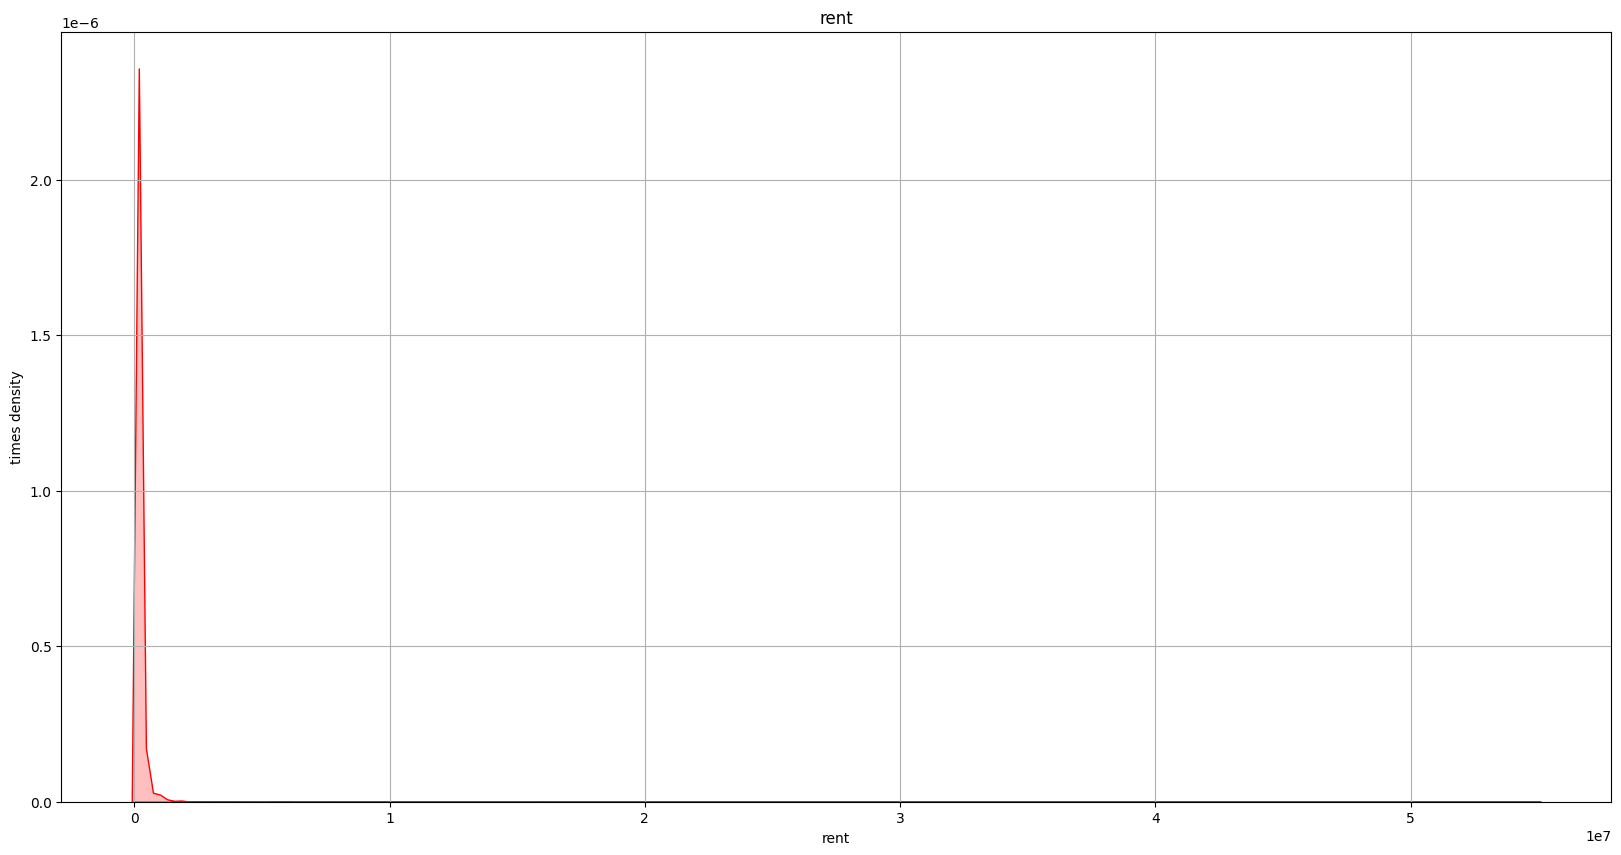

In [198]:
figure(figsize=(20,10))
sns.kdeplot(data= data ,x=data["Rent"],color="red",fill=True)
title("rent")
xlabel("rent")
ylabel("times density")
grid(True)
show()

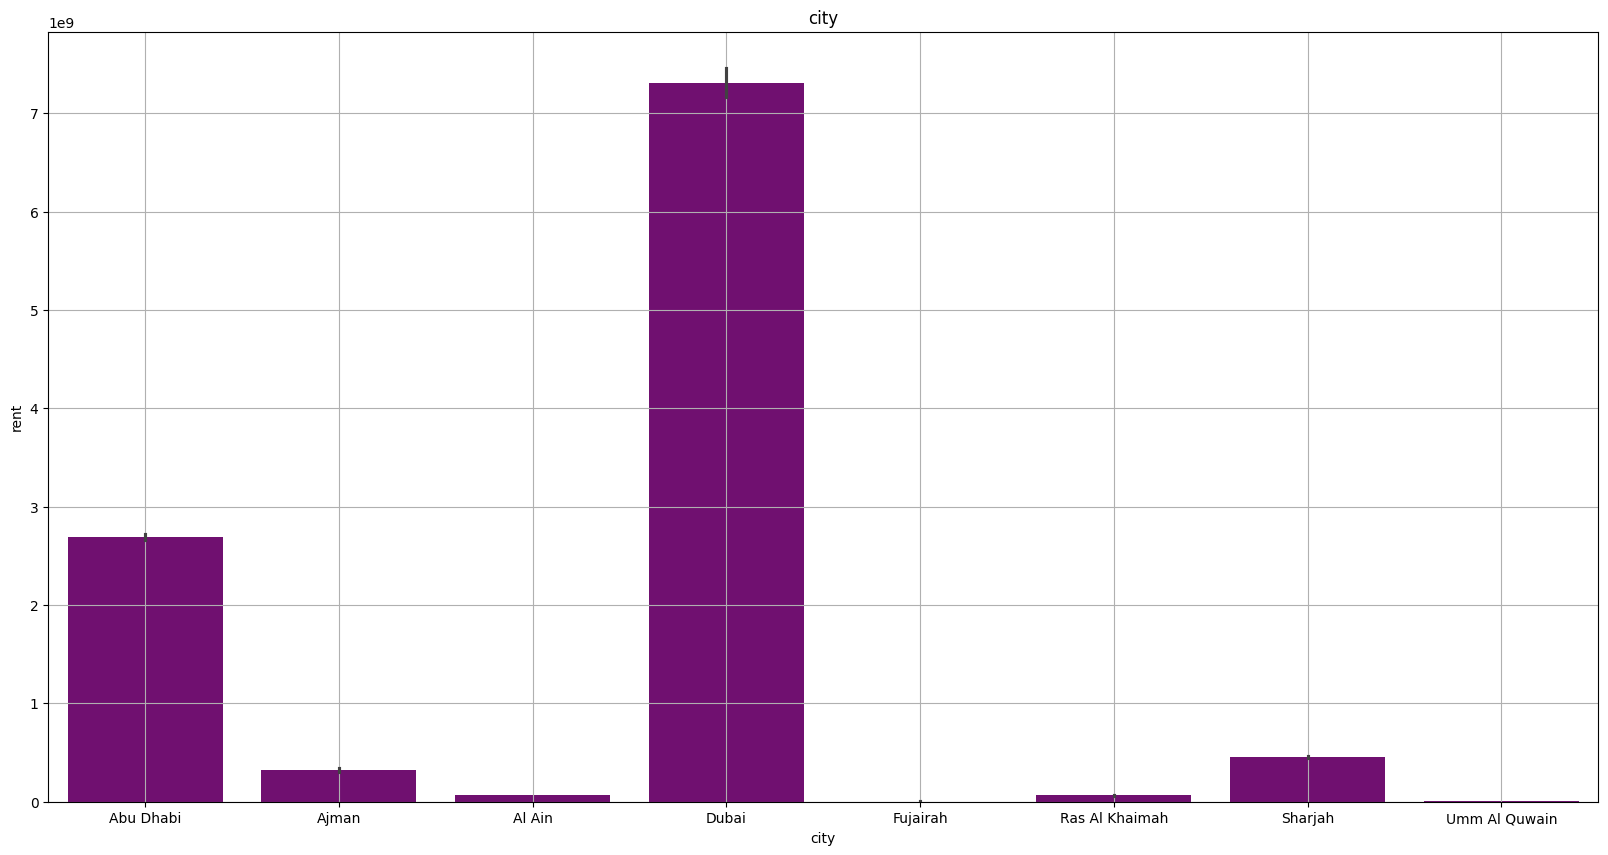

In [199]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["City"],y=data["Rent"],color="purple",estimator=sum)
title("city")
xlabel("city")
ylabel("rent")
grid(True)
show()

<h3> Dealing With Outliers </h3>

In [200]:
mean_ = data["Rent"].mean()
median_ = data["Rent"].median()
std_ = data["Rent"].std()

print(f"the mean of rent value {mean_} \n and median {median_}\n and standard deviation {std_} ")

the mean of rent value 147925.00166797754 
 and median 98000.0
 and standard deviation 306965.8301029959 


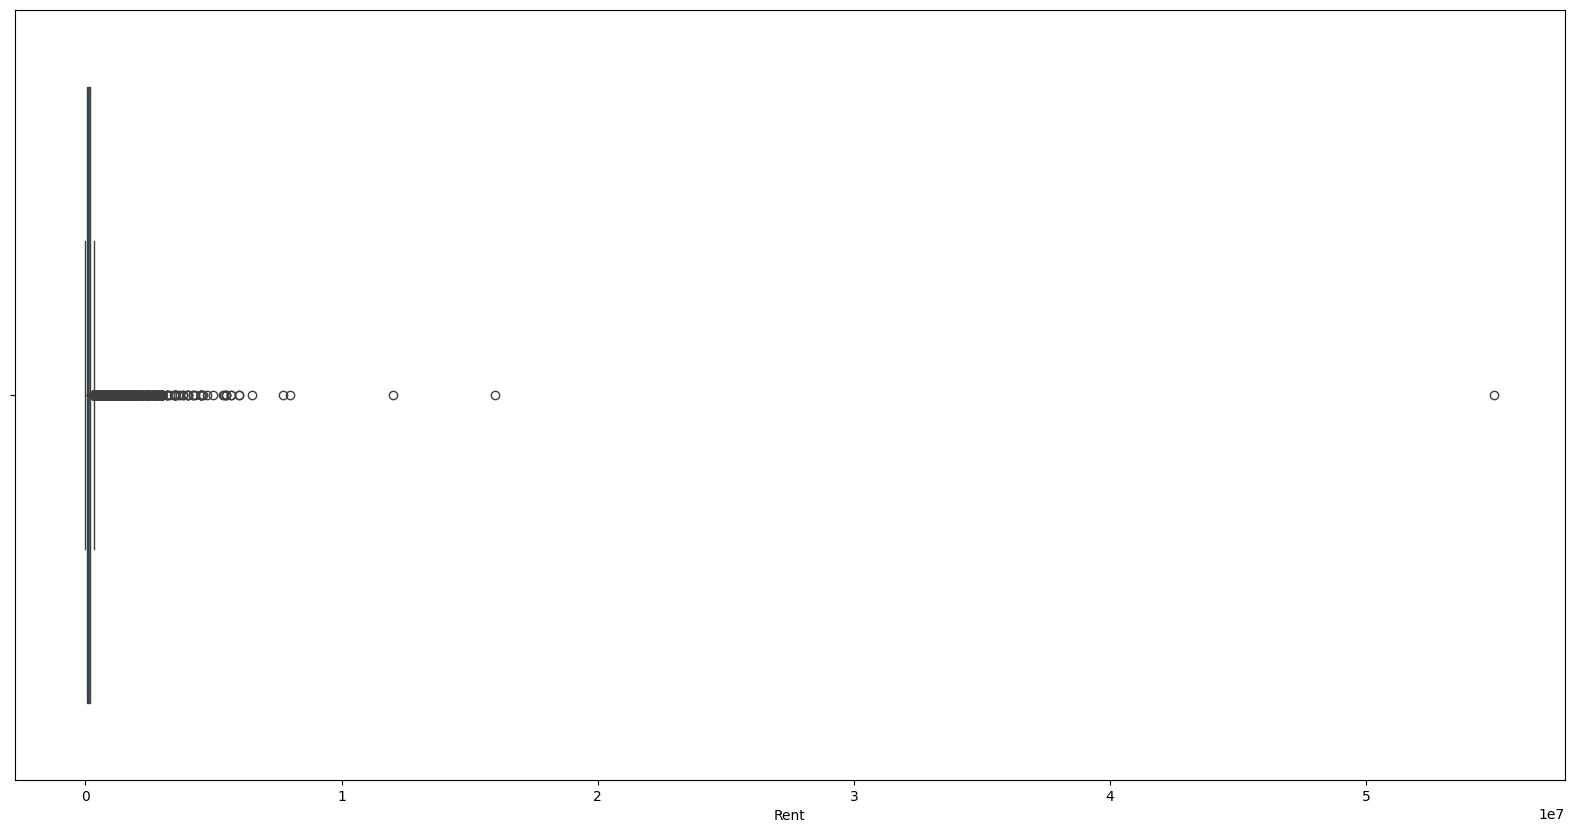

In [201]:
figure(figsize=(20,10))
sns.boxplot(data= data ,x=data["Rent"])
show()

In [202]:
q1 = percentile(data["Rent"], 25)
q3 = percentile(data["Rent"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)



In [203]:
data = data[(data["Rent"] >= lower_bound) & (data["Rent"] <= upper_bound)]
data.shape

(68870, 17)

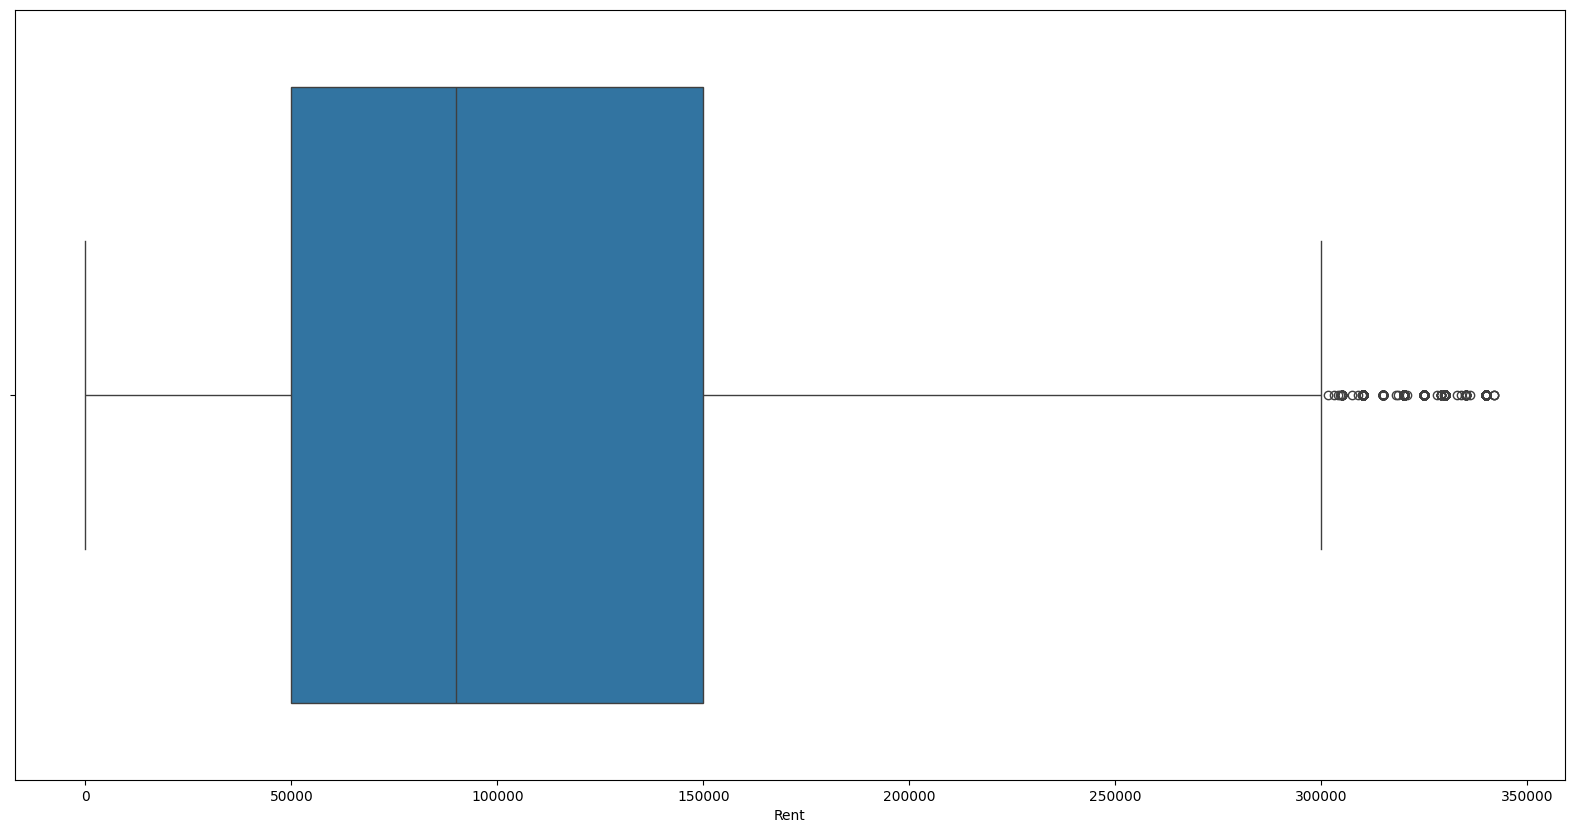

In [204]:
figure(figsize=(20,10))
sns.boxplot(data= data ,x=data["Rent"])
show()

<h3> Data Visual. After Outliers Removal</h3> 

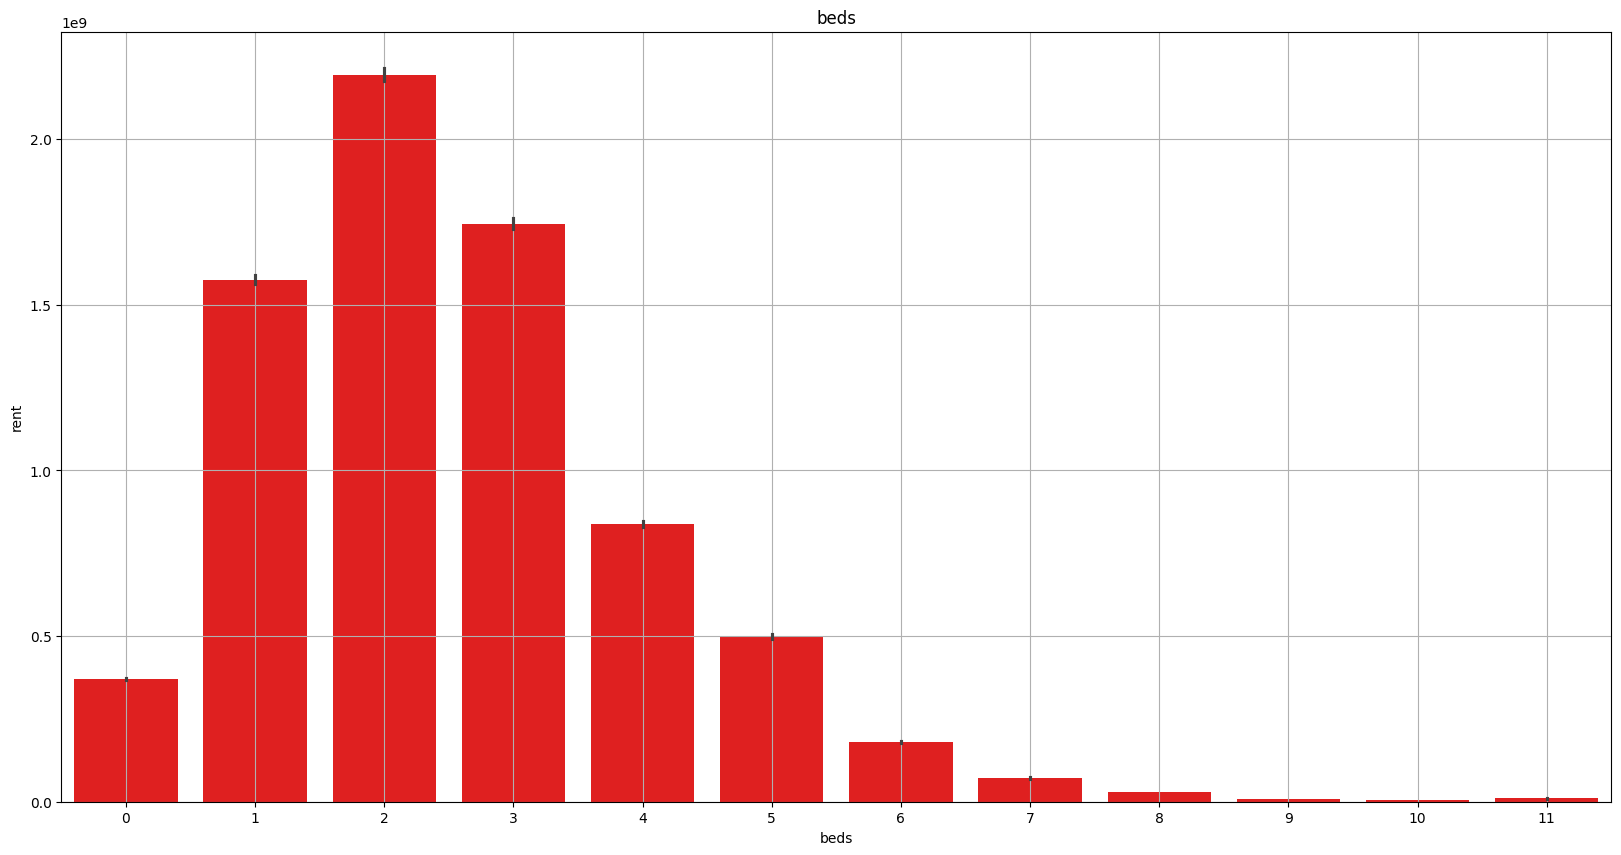

In [205]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Beds"],y=data["Rent"],color="red",estimator=sum)
title("beds")
xlabel("beds")
ylabel("rent")
grid(True)
show()

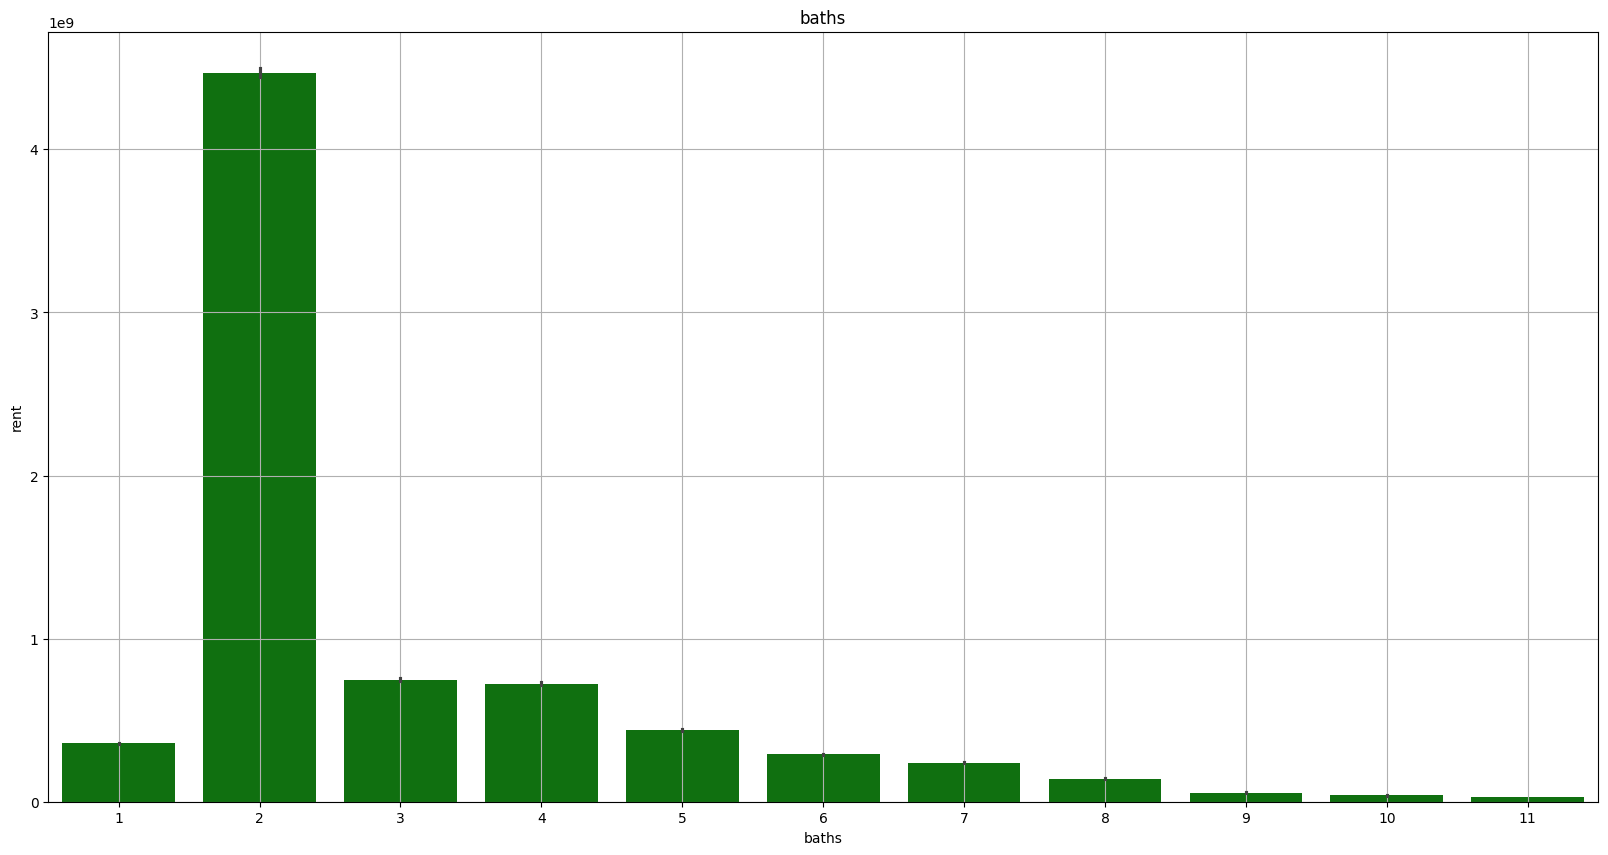

In [206]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Baths"],y=data["Rent"],color="green",estimator=sum)
title("baths")
xlabel("baths")
ylabel("rent")
grid(True)
show()

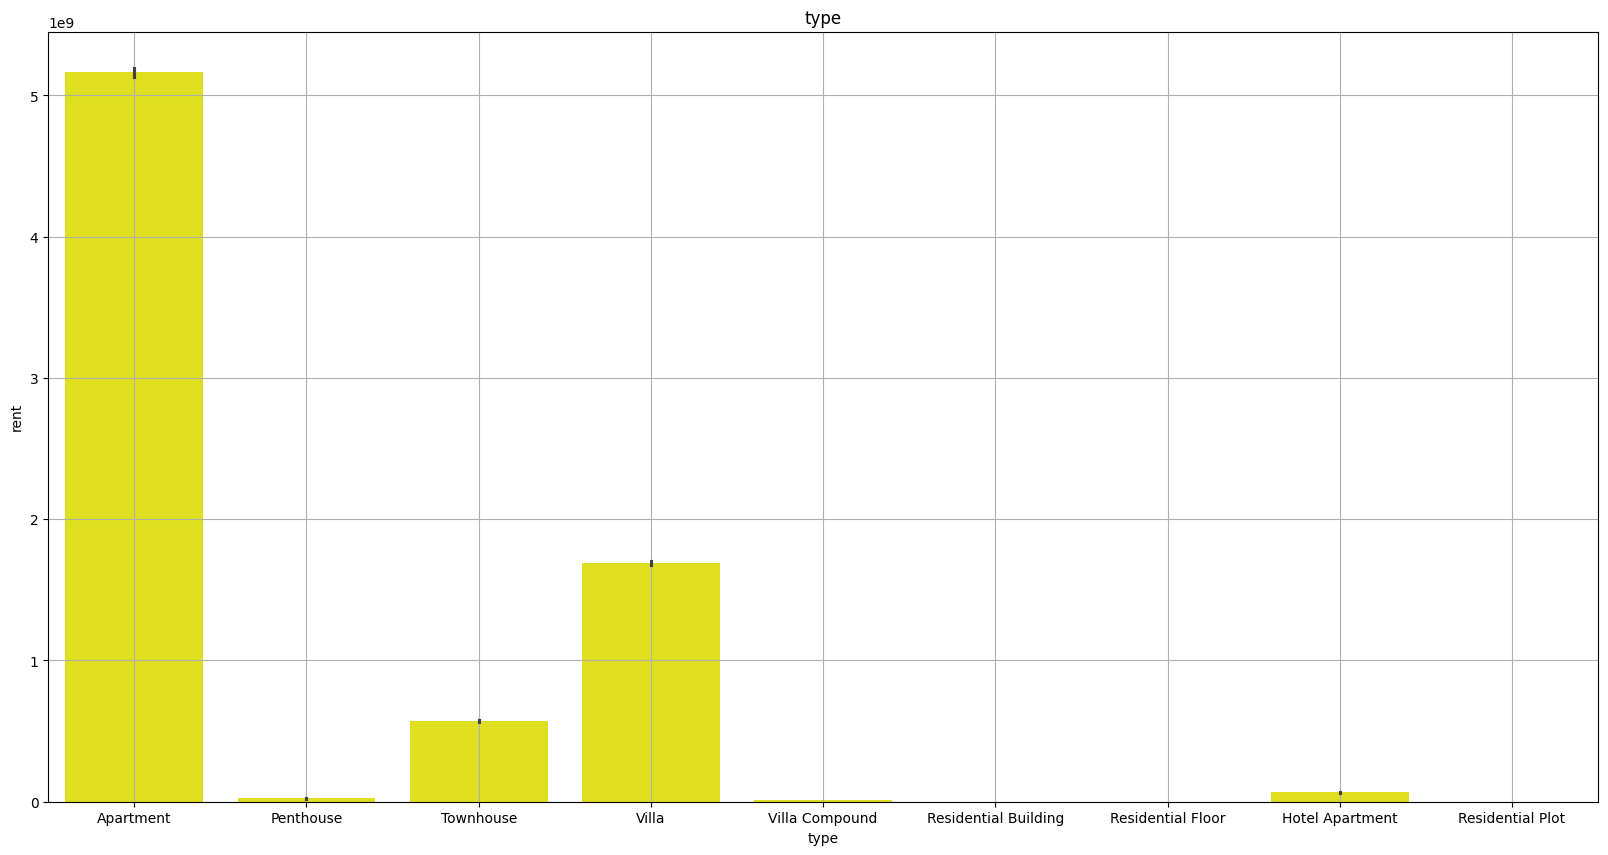

In [207]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Type"],y=data["Rent"],color="yellow",estimator=sum)
title("type")
xlabel("type")
ylabel("rent")
grid(True)
show()

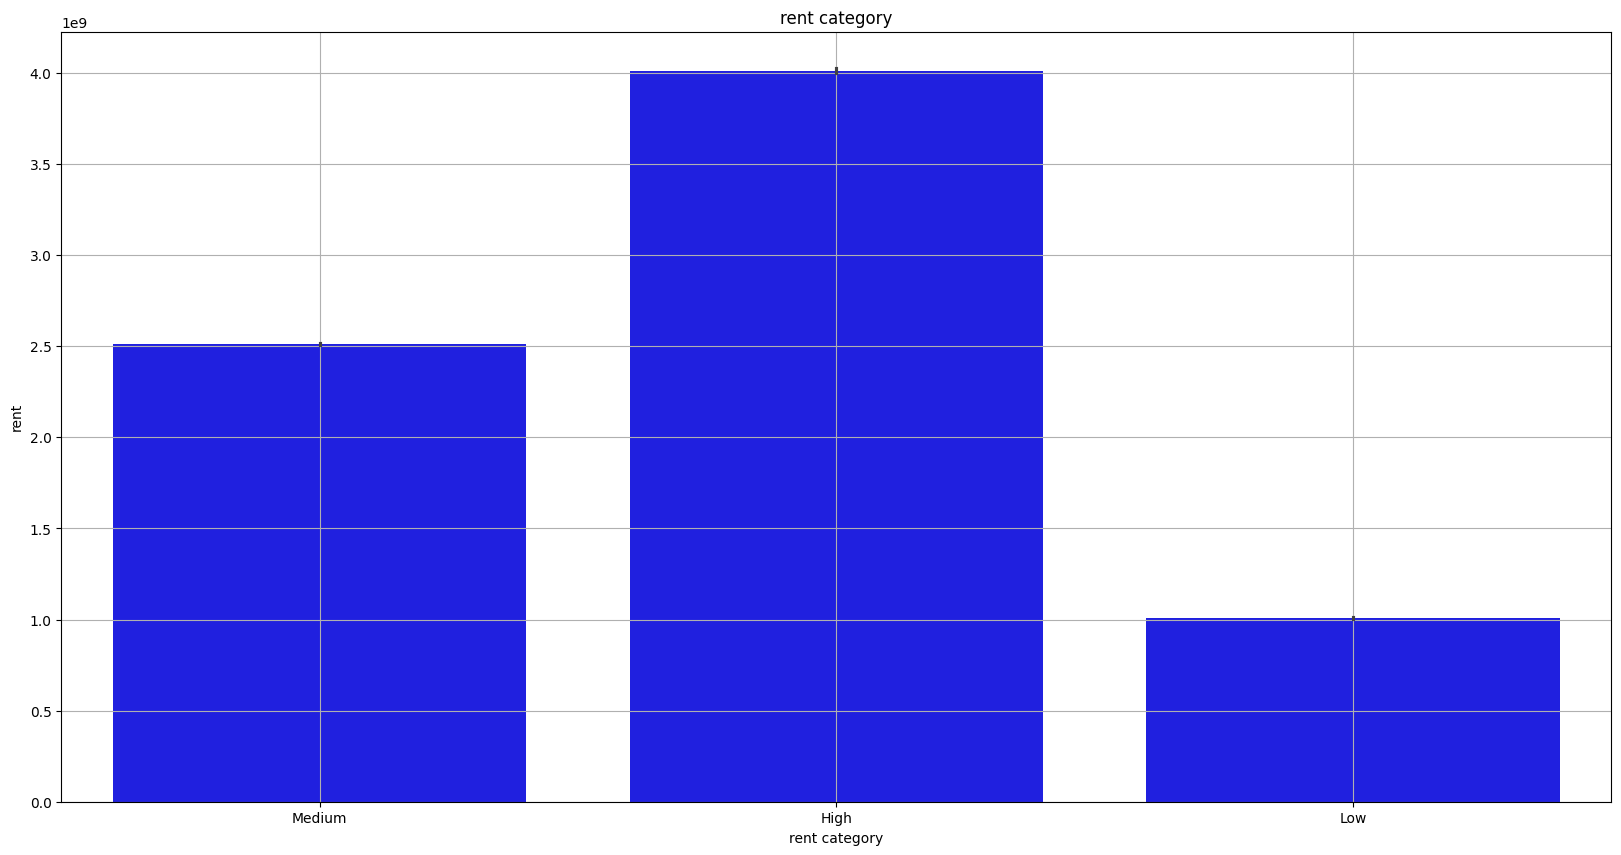

In [208]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Rent_category"],y=data["Rent"],color="blue",estimator=sum)
title("rent category")
xlabel("rent category")
ylabel("rent")
grid(True)
show()

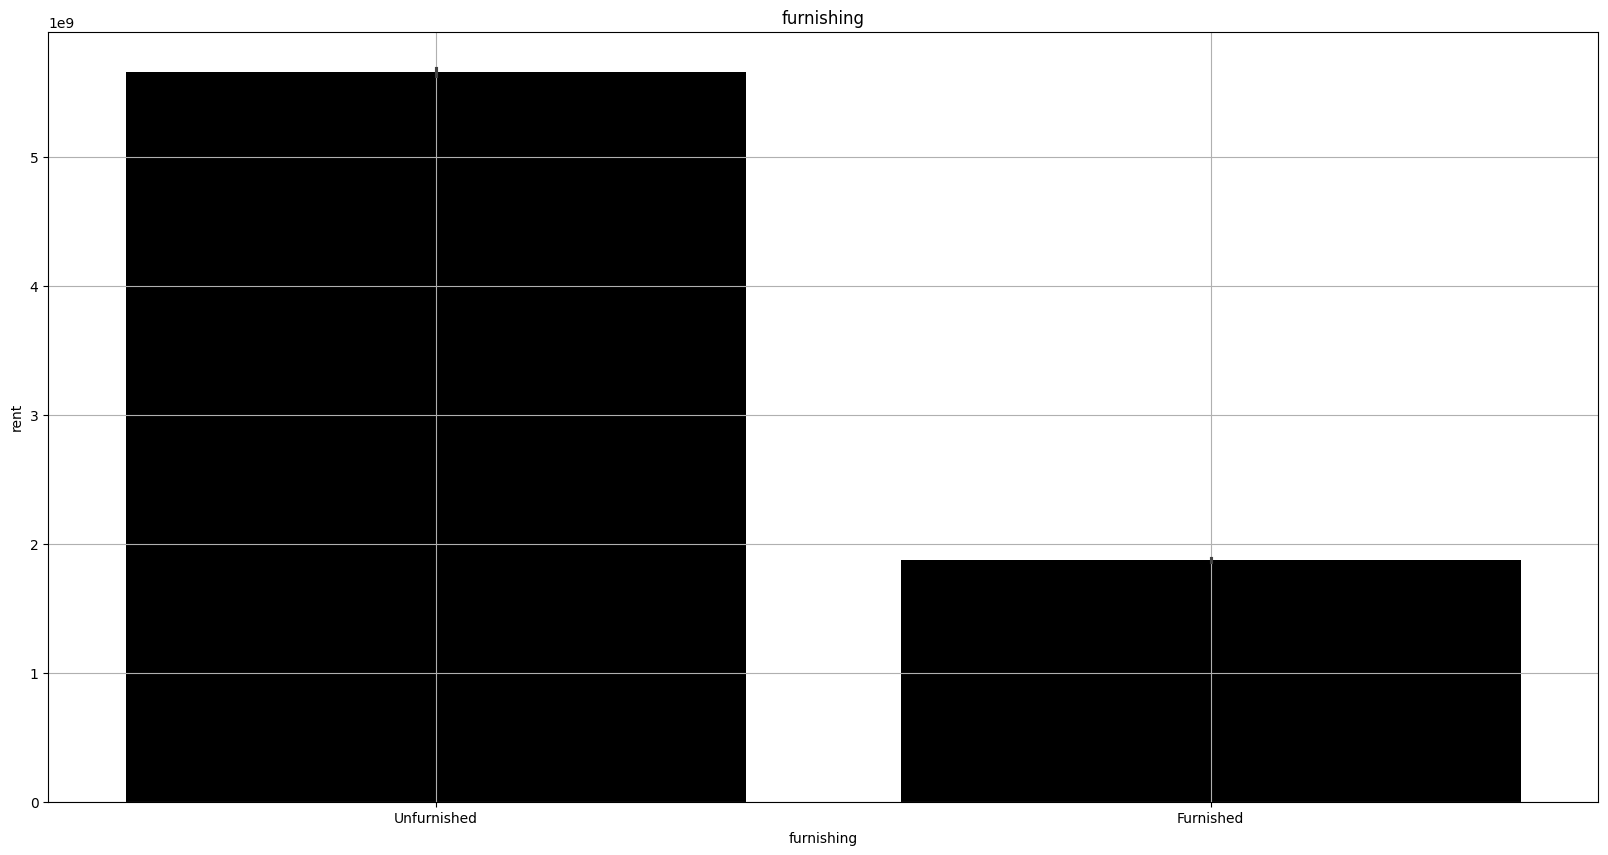

In [209]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Furnishing"],y=data["Rent"],color="black",estimator=sum)
title("furnishing")
xlabel("furnishing")
ylabel("rent")
grid(True)
show()

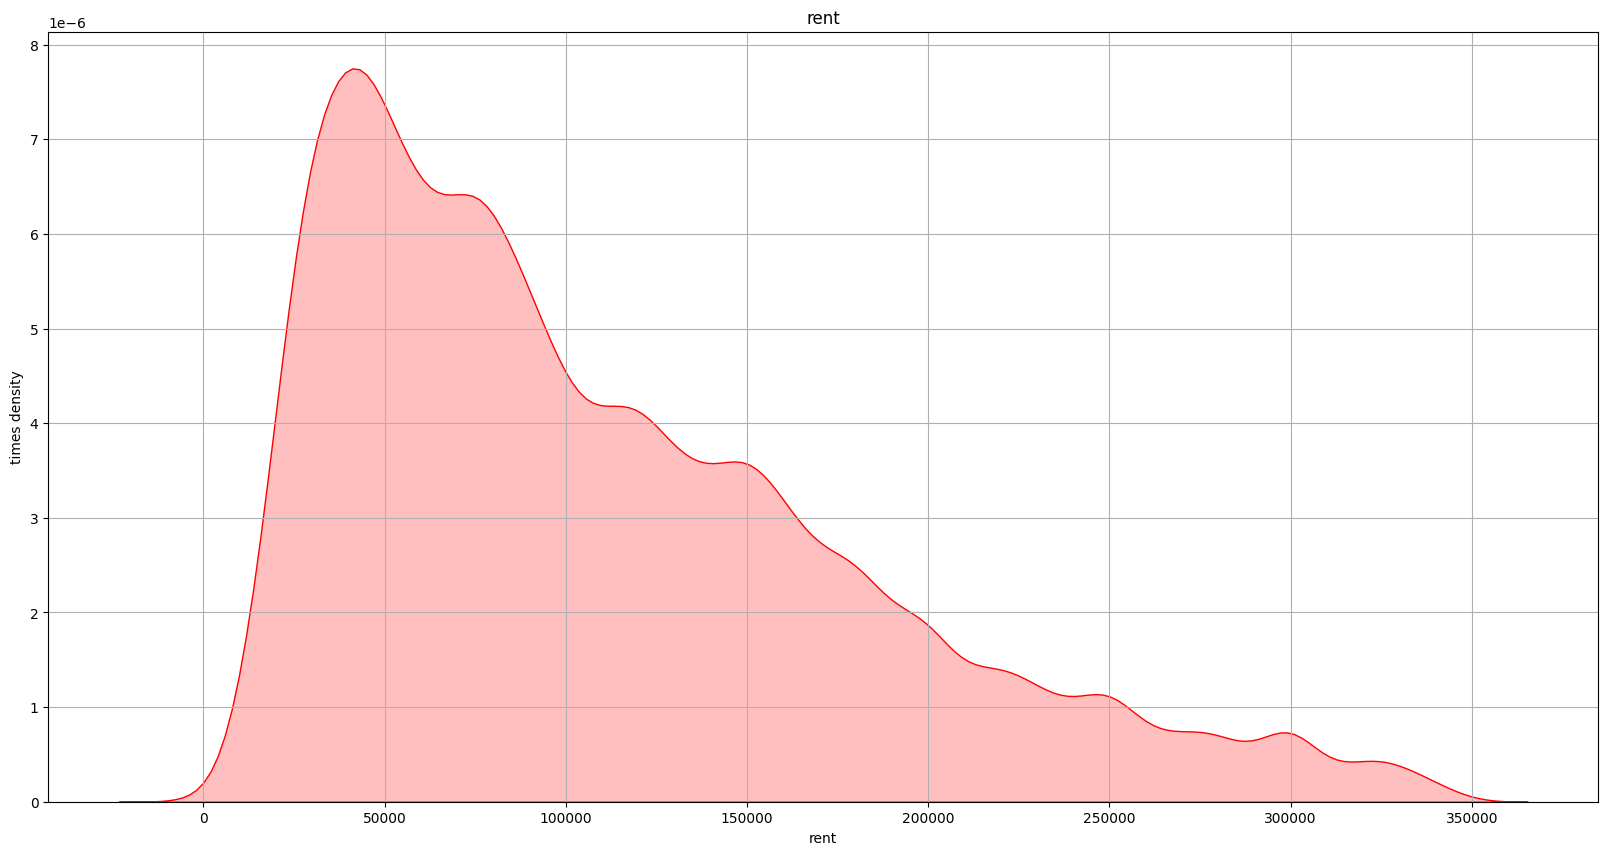

In [210]:
figure(figsize=(20,10))
sns.kdeplot(data= data ,x=data["Rent"],color="red",fill=True)
title("rent")
xlabel("rent")
ylabel("times density")
grid(True)
show()

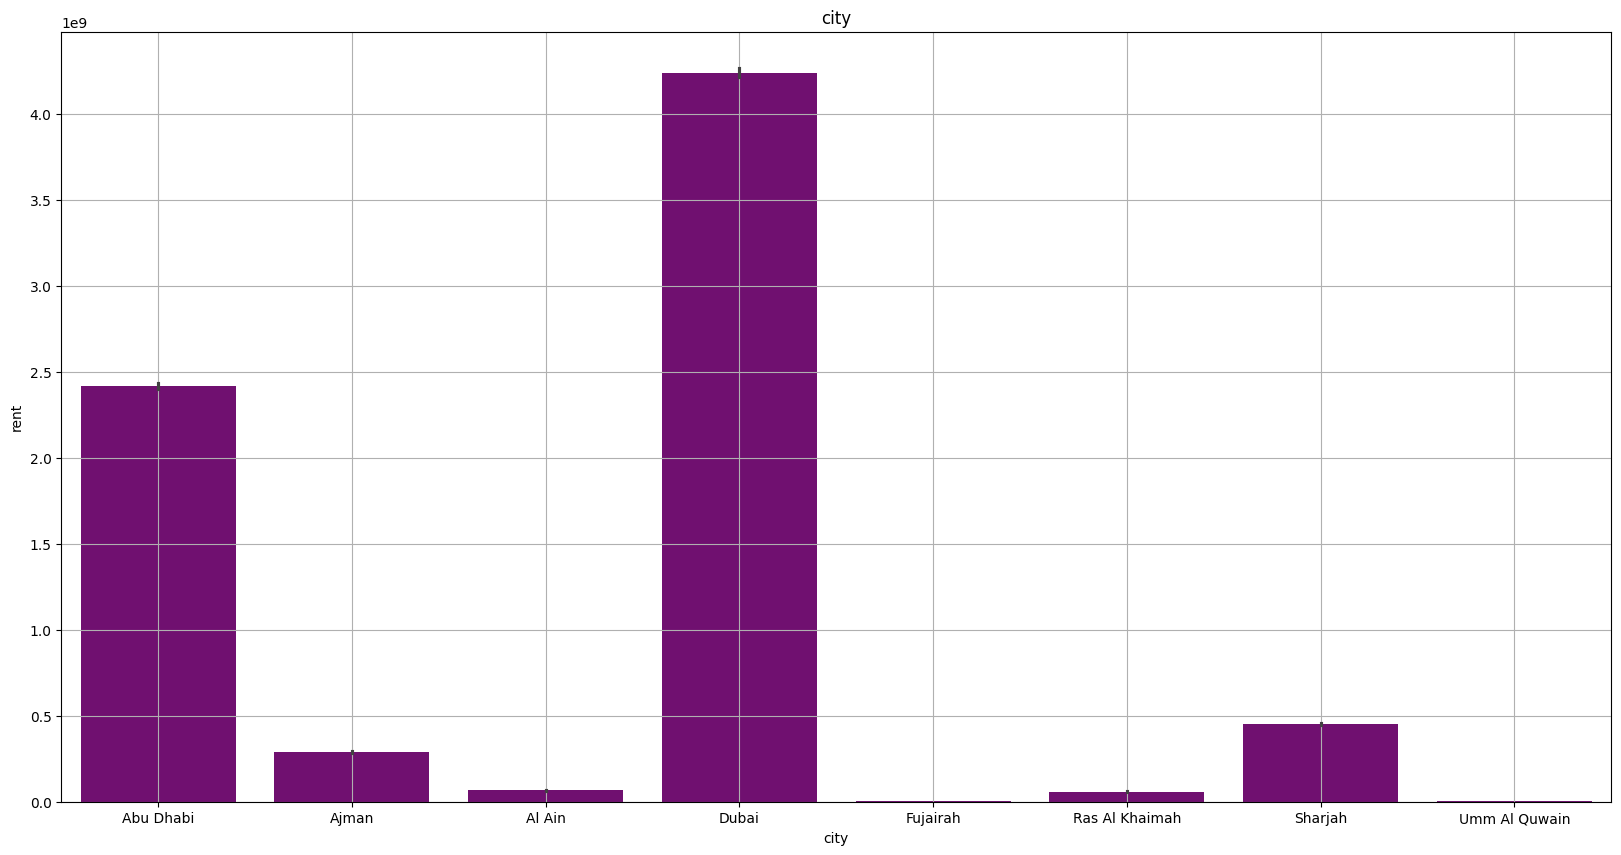

In [211]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["City"],y=data["Rent"],color="purple",estimator=sum)
title("city")
xlabel("city")
ylabel("rent")
grid(True)
show()

<h3> Data Preprocessing  </h3>

In [212]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data.columns:
   if data[x].dtype == "object":
       datanew = le.fit_transform(data[x])
       data[x] = datanew

In [213]:
data.sample(5)

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
44053,78,180000,1,2,0,801,224.719101,0,0,0,0,504,48,262,3,25.186684,55.274705
7770,4098,180000,2,2,0,1044,172.413793,0,0,0,0,508,44,431,0,24.486404,54.609071
67709,992,28000,1,2,0,960,29.166667,1,0,1,0,529,23,356,6,25.300001,55.441618
8458,2351,150000,5,7,7,5900,25.423729,0,0,1,0,315,237,322,0,24.420131,54.574954
18066,1226,142500,3,5,0,1786,79.787234,0,0,1,0,403,149,246,0,24.476780,54.320600


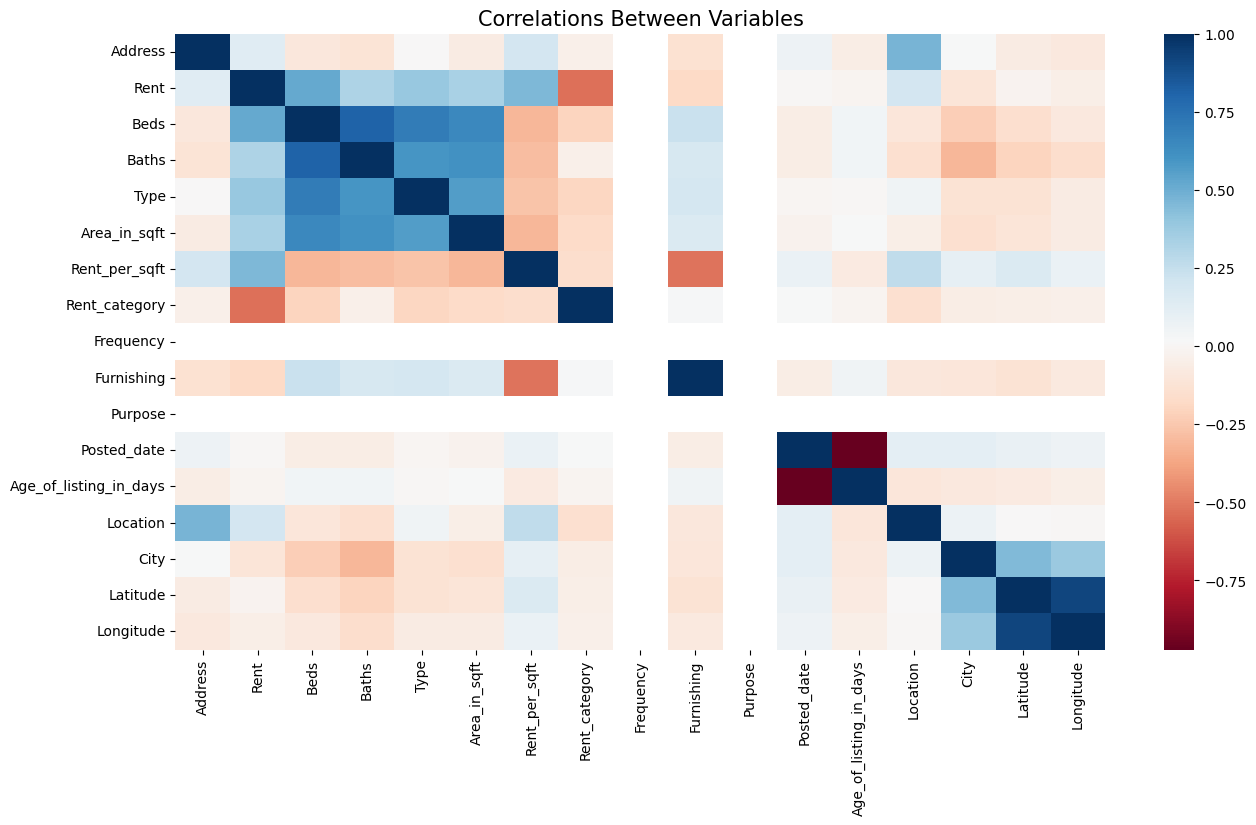

In [214]:
figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap="RdBu")
title("Correlations Between Variables", size=15)
show()

In [215]:
for col in data.columns:
    if data[col].dtype != "object":  
        if data["Rent"].corr(data[col]) < 0.2:
            data.drop(col,axis = 1 ,inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68870 entries, 0 to 73741
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent           68870 non-null  int64  
 1   Beds           68870 non-null  int64  
 2   Baths          68870 non-null  int64  
 3   Type           68870 non-null  int32  
 4   Area_in_sqft   68870 non-null  int64  
 5   Rent_per_sqft  68870 non-null  float64
 6   Frequency      68870 non-null  int32  
 7   Purpose        68870 non-null  int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 3.9 MB


c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [216]:
x = data.drop(["Rent"],axis=1)
y = data["Rent"]

<h2> Data Spliting </h2>

In [217]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

<h2> Data Modeling </h2>

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error

In [219]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lmedae = median_absolute_error(y_test,y_pred)
lmae = mean_absolute_error(y_test,y_pred)
lsme = mean_squared_error(y_test,y_pred)
lr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , lmedae)
print("mean absolute error is : " , lmae)
print("mean square error is : ",lsme)
print("r-squared is : " , lr2)

meadian absolute error is :  18203.87139378192
mean absolute error is :  25560.791866880892
mean square error is :  1489380196.764983
r-squared is :  0.7076486275753522


In [220]:
xgbr = XGBRegressor(n_estimators=20,max_depth=5,eta=0.1)
xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)

xgbmedae = median_absolute_error(y_test,y_pred)
xgbmae = mean_absolute_error(y_test,y_pred)
xgbsme = mean_squared_error(y_test,y_pred)
xgbr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , xgbmedae)
print("mean absolute error is : " , xgbmae)
print("mean square error is : ", xgbsme)
print("r-squared is : " , xgbr2)

meadian absolute error is :  7636.240234375
mean absolute error is :  9731.33382088196
mean square error is :  203137138.91238415
r-squared is :  0.9601260836685994


In [221]:
rfr = RandomForestRegressor(n_estimators=20,max_depth=5)
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

rfmedae = median_absolute_error(y_test,y_pred)
rfmae = mean_absolute_error(y_test,y_pred)
rfsme = mean_squared_error(y_test,y_pred)
rfr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , rfmedae)
print("mean absolute error is : " , rfmae)
print("mean square error is : ", rfsme)
print("r-squared is : " , rfr2)

meadian absolute error is :  9805.206604325518
mean absolute error is :  15072.443074963523
mean square error is :  497813287.3062802
r-squared is :  0.9022839177858483


<h2> Model Evaluation </h2>

In [222]:
scores = {
    "median absolute error" :[ lmedae , xgbmedae , rfmedae ],
    "mean absolute error" : [ lmae , xgbmae , rfmae ],
    "mean square error" : [ lsme , xgbsme , rfsme ],
    "r-squared" : [ lr2 , xgbr2 , rfr2 ]
       }
indexes = [ "LinearRegression" , "XGBRegessor" , "RandomForestRegressor" ]
datascore = DataFrame(scores ,index= indexes)
datascore["r-squared"].astype("float64")
datascore["mean square error"].astype("float64")
datascore["mean absolute error"].astype("float64")
datascore["median absolute error"].astype("float64")
datascore.head(4)


,median absolute error,mean absolute error,mean square error,r-squared
LinearRegression,18203.871394,25560.791867,1.489380e+09,0.707649
XGBRegessor,7636.240234,9731.333821,2.031371e+08,0.960126
RandomForestRegressor,9805.206604,15072.443075,4.978133e+08,0.902284


C:\Users\W.I\AppData\Local\Temp\ipykernel_15572\387659135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["r-squared"],palette= "mako" )


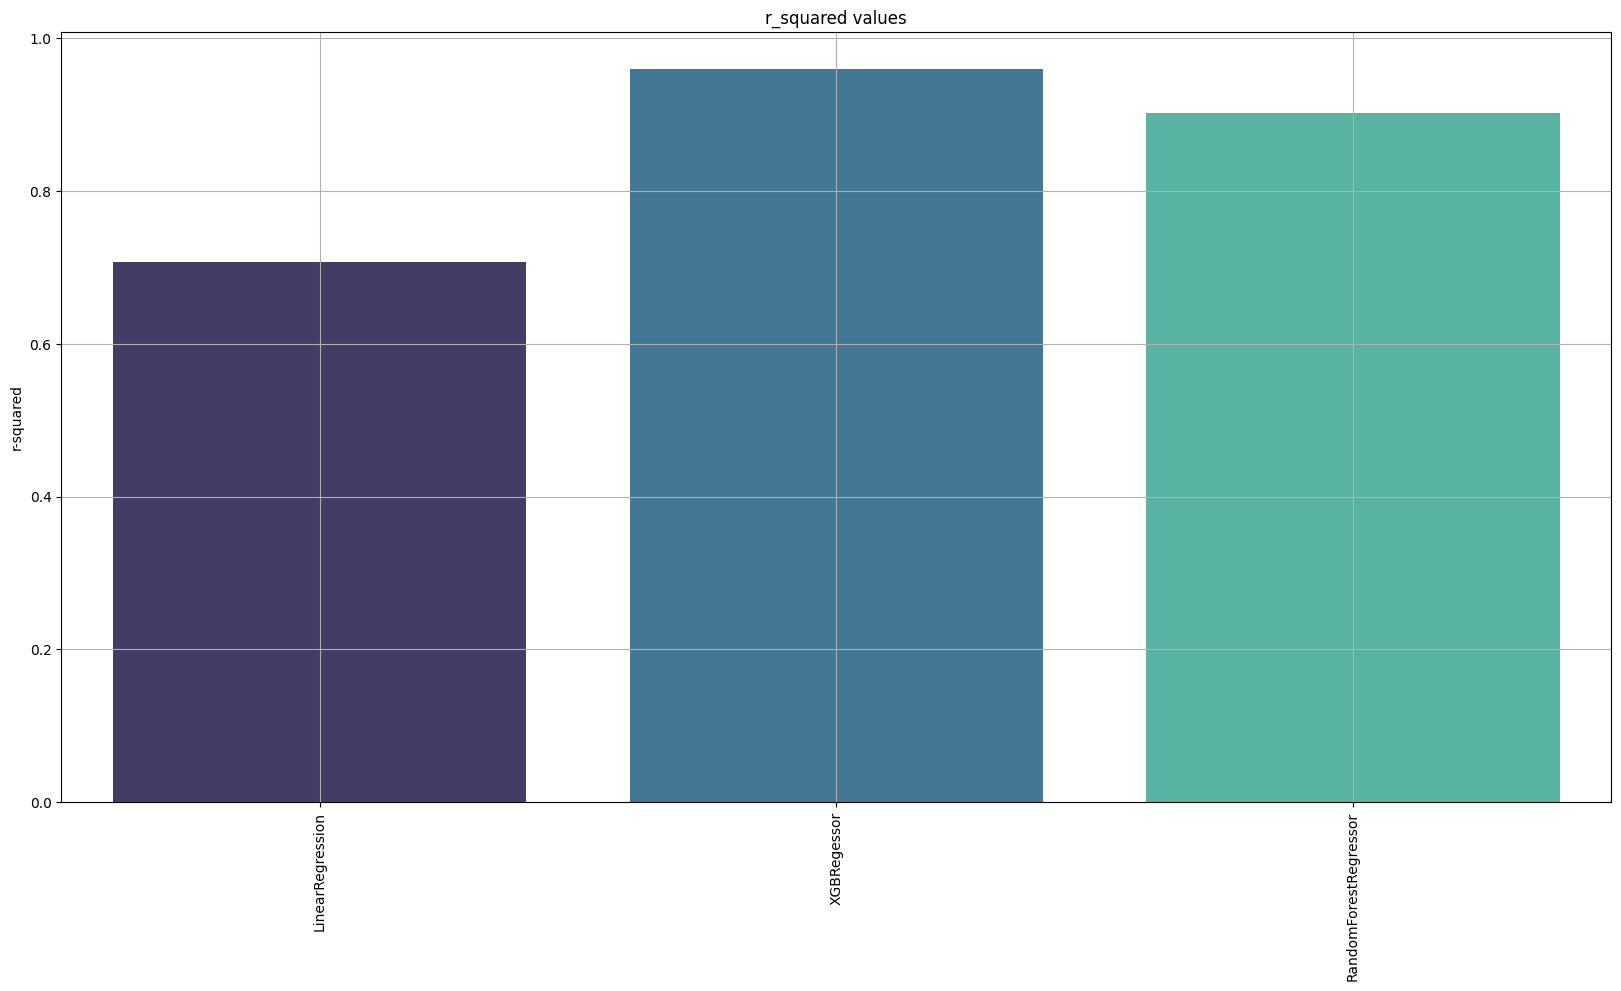

In [223]:
figure(figsize=(20,10))
sns.barplot( datascore["r-squared"],palette= "mako" )
title("r_squared values")
grid(True)
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_15572\1776364678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["mean square error"] , palette= "deep" )


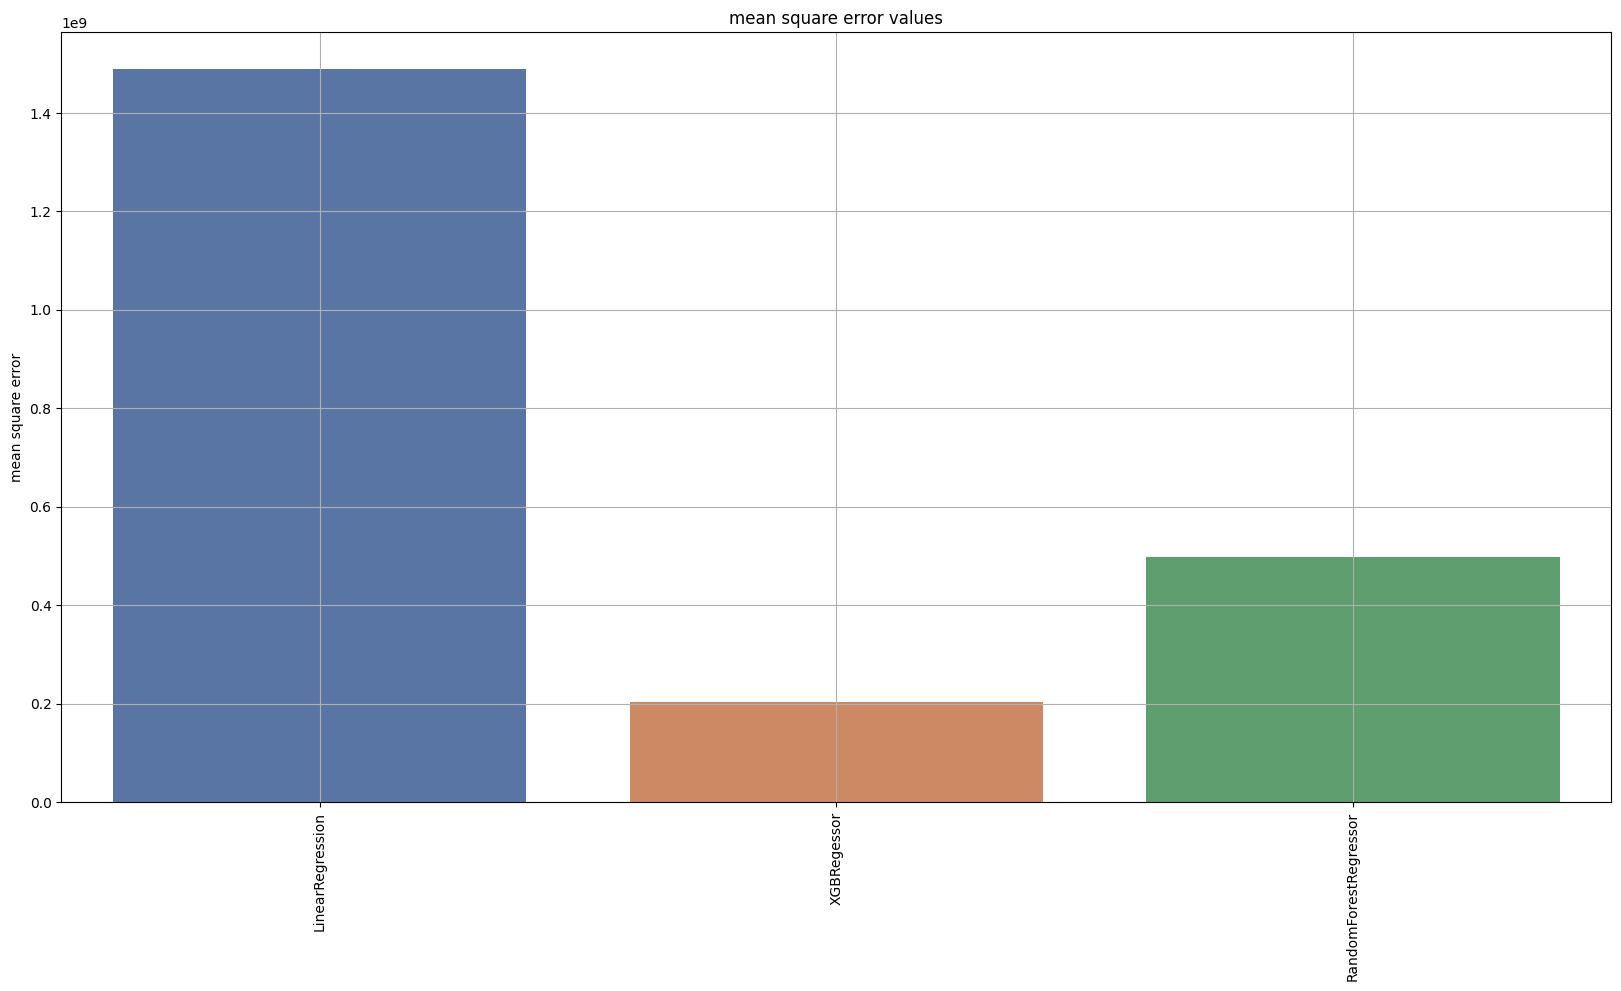

In [224]:
figure(figsize=(20,10))
sns.barplot( datascore["mean square error"] , palette= "deep" )
title("mean square error values")
grid(True)
xticks(rotation=90)
show()